In [1]:
# Introduction

In [2]:
## Loading Libraries

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
plt.rcParams['font.family'] = 'Times New Roman'

In [4]:
## Loading Dataset

In [5]:
### Files in folder

path='FTIR Dataset/'

Files=[File for File in os.listdir(path)]
print(len(Files))
print(Files)

218
['0.1.dpt', '0.10.dpt', '0.2.dpt', '0.3.dpt', '0.4.dpt', '0.5.dpt', '0.6.dpt', '0.7.dpt', '0.8.dpt', '0.9.dpt', '1.1.dpt', '1.2.dpt', '1.3.dpt', '1.4.dpt', '1.5.dpt', '1.6.dpt', '10.1.dpt', '10.10.dpt', '10.2.dpt', '10.3.dpt', '10.4.dpt', '10.5.dpt', '10.6.dpt', '10.7.dpt', '10.8.dpt', '10.9.dpt', '100.1.dpt', '100.10.dpt', '100.2.dpt', '100.3.dpt', '100.4.dpt', '100.5.dpt', '100.6.dpt', '100.7.dpt', '100.8.dpt', '100.9.dpt', '11.1.dpt', '11.2.dpt', '11.3.dpt', '11.4.dpt', '11.5.dpt', '11.6.dpt', '12.1.dpt', '12.2.dpt', '12.3.dpt', '12.4.dpt', '12.5.dpt', '12.6.dpt', '13.1.dpt', '13.2.dpt', '13.3.dpt', '13.4.dpt', '13.5.dpt', '13.6.dpt', '14.1.dpt', '14.2.dpt', '14.3.dpt', '14.4.dpt', '14.5.dpt', '14.6.dpt', '15.1.dpt', '15.2.dpt', '15.3.dpt', '15.4.dpt', '15.5.dpt', '15.6.dpt', '16.1.dpt', '16.2.dpt', '16.3.dpt', '16.4.dpt', '16.5.dpt', '16.6.dpt', '17.1.dpt', '17.2.dpt', '17.3.dpt', '17.4.dpt', '17.5.dpt', '17.6.dpt', '18.1.dpt', '18.2.dpt', '18.3.dpt', '18.4.dpt', '18.5.dpt', '1

In [6]:
### Dataframe creation

df=pd.DataFrame()
Target=[]

for File in Files:
    
  temp_df=pd.read_csv(os.path.join(path, File), sep='\t', names=[1, 2], index_col=0)
  temp_df=temp_df.T
  Target.append(File.split('.')[0])
  df=pd.concat([df, temp_df], axis=0, ignore_index=True)
  df = df.reindex(sorted(df.columns, key=float), axis=1)
  df.interpolate(method='linear', axis=1, inplace=True) #### To interpolate linearly at same wavenumber

df['Target']=Target
df['Target']=df['Target'].astype(float)/100.0
df.dropna(axis=1, inplace=True)
df.head()

1,499.24539,501.23394,501.2999,503.28818,503.35441,505.34242,505.40892,507.39666,507.46343,509.45089,...,3989.32917,3989.85414,3991.38341,3991.90864,3993.43765,3993.96315,3995.49188,3996.01766,3997.54612,Target
0,0.285685,0.28567,0.299095,0.31252,0.322775,0.333030,0.325970,0.318910,0.306360,0.29381,...,0.00614,0.006050,0.005960,0.005930,0.005900,0.005950,0.006000,0.006115,0.00623,0.0
1,-0.071510,-0.07824,-0.084970,-0.07924,-0.073510,-0.058175,-0.042840,-0.032935,-0.023030,-0.02628,...,-0.03079,-0.030840,-0.030825,-0.030810,-0.030695,-0.030580,-0.030445,-0.030310,-0.03031,0.0
2,0.310230,0.30089,0.310420,0.31995,0.326085,0.332220,0.322500,0.312780,0.301910,0.29104,...,0.00665,0.006585,0.006520,0.006555,0.006590,0.006650,0.006710,0.006700,0.00669,0.0
3,0.353515,0.34502,0.344660,0.34430,0.343595,0.342890,0.340165,0.337440,0.333335,0.32923,...,0.00153,0.001465,0.001400,0.001395,0.001390,0.001445,0.001500,0.001565,0.00163,0.0
4,0.244705,0.22002,0.215490,0.21096,0.228045,0.245130,0.260150,0.275170,0.281050,0.28693,...,0.00188,0.001765,0.001650,0.001590,0.001530,0.001585,0.001640,0.001755,0.00187,0.0


In [7]:
## Data Analysis - Before Outlier Removal

In [8]:
df.shape

(218, 3407)

In [9]:
df['Target'].value_counts()

Target
0.00    10
0.30    10
0.80    10
0.70    10
0.60    10
0.50    10
0.40    10
0.20    10
0.90    10
0.10    10
1.00    10
0.05     6
0.09     6
0.08     6
0.07     6
0.11     6
0.06     6
0.12     6
0.15     6
0.16     6
0.04     6
0.14     6
0.03     6
0.01     6
0.02     6
0.19     6
0.18     6
0.17     6
0.13     6
Name: count, dtype: int64

In [10]:
df.describe()

1,499.24539,501.23394,501.2999,503.28818,503.35441,505.34242,505.40892,507.39666,507.46343,509.45089,...,3989.32917,3989.85414,3991.38341,3991.90864,3993.43765,3993.96315,3995.49188,3996.01766,3997.54612,Target
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.145343,0.148899,0.149081,0.150327,0.147546,0.148762,0.149194,0.150449,0.152458,0.152628,...,-0.016723,-0.016749,-0.016758,-0.016750,-0.016712,-0.016678,-0.016636,-0.016601,-0.016598,0.301835
std,0.127204,0.129070,0.129819,0.129800,0.128471,0.124531,0.120511,0.116253,0.111565,0.109786,...,0.016701,0.016720,0.016712,0.016711,0.016689,0.016663,0.016643,0.016615,0.016606,0.304053
min,-0.071510,-0.078240,-0.084970,-0.080985,-0.083640,-0.071535,-0.059430,-0.046295,-0.042720,-0.047595,...,-0.057670,-0.057770,-0.057860,-0.057950,-0.057950,-0.057950,-0.057890,-0.057830,-0.057830,0.000000
25%,0.047896,0.054856,0.052687,0.054510,0.062760,0.065166,0.069700,0.074551,0.081565,0.089245,...,-0.030740,-0.030710,-0.030665,-0.030620,-0.030570,-0.030520,-0.030445,-0.030310,-0.030310,0.080000
50%,0.150775,0.159890,0.171995,0.177340,0.174268,0.163825,0.166013,0.165820,0.163495,0.162670,...,-0.012053,-0.012105,-0.012183,-0.012260,-0.012255,-0.012250,-0.012170,-0.012090,-0.012090,0.160000
75%,0.247881,0.244580,0.254092,0.256483,0.255092,0.248765,0.249389,0.247227,0.245042,0.243750,...,-0.003169,-0.003179,-0.003170,-0.003101,-0.002998,-0.002986,-0.003035,-0.003064,-0.003093,0.500000
max,0.406875,0.420680,0.398625,0.376570,0.366005,0.362880,0.343410,0.349060,0.333335,0.329230,...,0.011690,0.011760,0.011775,0.011790,0.011820,0.011850,0.011910,0.011970,0.011970,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Columns: 3407 entries, 499.24539 to Target
dtypes: float64(3407)
memory usage: 5.7 MB


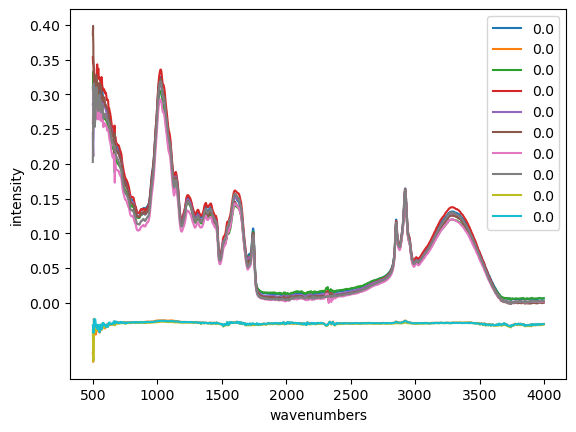

In [12]:
## Each class plotting

x=df.iloc[:, :-1].columns
new_df=df[df['Target']==0]
for i in range(new_df.shape[0]):
    y=new_df.iloc[:, :-1].iloc[i]
    sns.lineplot(x=x, y=y, label=new_df.iloc[i, -1])

plt.xlabel('wavenumbers')
plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40])
plt.ylabel('intensity')
plt.show()

### Discussion

There are certain outliers which are removed by visual inspection.

In [13]:
## After Outlier Removal

In [14]:
### Files in folder

path='FTIR Dataset No Outliers/'

Files=[File for File in os.listdir(path)]
print(len(Files))
print(Files)

179
['0.1.dpt', '0.2.dpt', '0.3.dpt', '0.4.dpt', '0.5.dpt', '0.6.dpt', '0.7.dpt', '1.1.dpt', '1.2.dpt', '1.3.dpt', '1.4.dpt', '1.5.dpt', '1.6.dpt', '10.1.dpt', '10.2.dpt', '10.3.dpt', '10.4.dpt', '10.5.dpt', '100.1.dpt', '100.10.dpt', '100.2.dpt', '100.3.dpt', '100.4.dpt', '100.5.dpt', '100.6.dpt', '100.7.dpt', '100.8.dpt', '100.9.dpt', '11.1.dpt', '11.2.dpt', '11.3.dpt', '11.4.dpt', '11.5.dpt', '12.1.dpt', '12.2.dpt', '12.3.dpt', '12.4.dpt', '12.5.dpt', '13.1.dpt', '13.2.dpt', '13.3.dpt', '13.4.dpt', '13.5.dpt', '13.6.dpt', '14.1.dpt', '14.2.dpt', '14.3.dpt', '14.4.dpt', '14.5.dpt', '14.6.dpt', '15.1.dpt', '15.2.dpt', '15.3.dpt', '15.4.dpt', '15.5.dpt', '15.6.dpt', '16.1.dpt', '16.2.dpt', '16.3.dpt', '16.4.dpt', '16.5.dpt', '16.6.dpt', '17.1.dpt', '17.2.dpt', '17.3.dpt', '17.4.dpt', '17.5.dpt', '17.6.dpt', '18.1.dpt', '18.2.dpt', '18.3.dpt', '18.4.dpt', '18.5.dpt', '18.6.dpt', '19.1.dpt', '19.2.dpt', '19.3.dpt', '19.4.dpt', '19.5.dpt', '19.6.dpt', '2.1.dpt', '2.2.dpt', '2.3.dpt', '2.4

In [15]:
### Dataframe creation

df=pd.DataFrame()
Target=[]

for File in Files:
    
  temp_df=pd.read_csv(os.path.join(path, File), sep='\t', names=[1, 2], index_col=0)
  temp_df=temp_df.T
  Target.append(File.split('.')[0])
  df=pd.concat([df, temp_df], axis=0, ignore_index=True)
  df = df.reindex(sorted(df.columns, key=float), axis=1)
  df.interpolate(method='linear', axis=1, inplace=True) #### To interpolate linearly at same wavenumber

df['Target']=Target
df['Target']=df['Target'].astype(float)/100.0
df.dropna(axis=1, inplace=True)
df.head()

1,499.24539,501.23394,501.2999,503.28818,503.35441,505.34242,505.40892,507.39666,507.46343,509.45089,...,3989.32917,3989.85414,3991.38341,3991.90864,3993.43765,3993.96315,3995.49188,3996.01766,3997.54612,Target
0,0.285685,0.28567,0.299095,0.31252,0.322775,0.33303,0.325970,0.31891,0.306360,0.29381,...,0.00614,0.006050,0.00596,0.005930,0.00590,0.005950,0.00600,0.006115,0.00623,0.0
1,0.310230,0.30089,0.310420,0.31995,0.326085,0.33222,0.322500,0.31278,0.301910,0.29104,...,0.00665,0.006585,0.00652,0.006555,0.00659,0.006650,0.00671,0.006700,0.00669,0.0
2,0.353515,0.34502,0.344660,0.34430,0.343595,0.34289,0.340165,0.33744,0.333335,0.32923,...,0.00153,0.001465,0.00140,0.001395,0.00139,0.001445,0.00150,0.001565,0.00163,0.0
3,0.244705,0.22002,0.215490,0.21096,0.228045,0.24513,0.260150,0.27517,0.281050,0.28693,...,0.00188,0.001765,0.00165,0.001590,0.00153,0.001585,0.00164,0.001755,0.00187,0.0
4,0.385975,0.39838,0.384900,0.37142,0.358035,0.34465,0.328860,0.31307,0.302525,0.29198,...,0.00014,0.000185,0.00023,0.000230,0.00023,0.000180,0.00013,0.000090,0.00005,0.0


In [16]:
## Data Analysis - After Outlier Removal

In [17]:
df.shape

(179, 3407)

In [18]:
df['Target'].value_counts()

Target
1.00    10
0.90     8
0.30     7
0.70     7
0.50     7
0.00     7
0.20     7
0.03     6
0.08     6
0.07     6
0.06     6
0.05     6
0.40     6
0.14     6
0.13     6
0.01     6
0.02     6
0.19     6
0.18     6
0.17     6
0.16     6
0.15     6
0.04     6
0.12     5
0.11     5
0.60     5
0.10     5
0.80     5
0.09     5
Name: count, dtype: int64

In [19]:
df.describe()

1,499.24539,501.23394,501.2999,503.28818,503.35441,505.34242,505.40892,507.39666,507.46343,509.45089,...,3989.32917,3989.85414,3991.38341,3991.90864,3993.43765,3993.96315,3995.49188,3996.01766,3997.54612,Target
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,...,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.182444,0.188606,0.190611,0.192703,0.189939,0.189952,0.189081,0.188986,0.189838,0.190239,...,-0.014524,-0.014554,-0.014567,-0.014559,-0.014524,-0.014492,-0.014457,-0.014430,-0.014427,0.276425
std,0.107981,0.105444,0.102361,0.100489,0.098410,0.095264,0.092284,0.089011,0.084592,0.081172,...,0.017457,0.017483,0.017477,0.017478,0.017453,0.017425,0.017406,0.017378,0.017367,0.302517
min,-0.071510,-0.078240,-0.084970,-0.080985,-0.083640,-0.071535,-0.059430,-0.046295,-0.033160,-0.031595,...,-0.057670,-0.057770,-0.057860,-0.057950,-0.057950,-0.057950,-0.057890,-0.057830,-0.057830,0.000000
25%,0.099255,0.099043,0.106965,0.120425,0.119845,0.125100,0.127060,0.131310,0.130385,0.130085,...,-0.029365,-0.029358,-0.029325,-0.029263,-0.029200,-0.029150,-0.029090,-0.029038,-0.028985,0.070000
50%,0.179560,0.199430,0.203510,0.203390,0.197340,0.198410,0.197340,0.195765,0.193680,0.198385,...,-0.008680,-0.008745,-0.008810,-0.008765,-0.008700,-0.008575,-0.008510,-0.008480,-0.008330,0.150000
75%,0.260635,0.257290,0.265930,0.271240,0.268115,0.267060,0.262543,0.258870,0.258443,0.257480,...,0.000295,0.000338,0.000380,0.000418,0.000455,0.000425,0.000395,0.000343,0.000290,0.400000
max,0.406875,0.420680,0.398625,0.376570,0.366005,0.362880,0.343410,0.349060,0.333335,0.329230,...,0.011690,0.011760,0.011775,0.011790,0.011820,0.011850,0.011910,0.011970,0.011970,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Columns: 3407 entries, 499.24539 to Target
dtypes: float64(3407)
memory usage: 4.7 MB


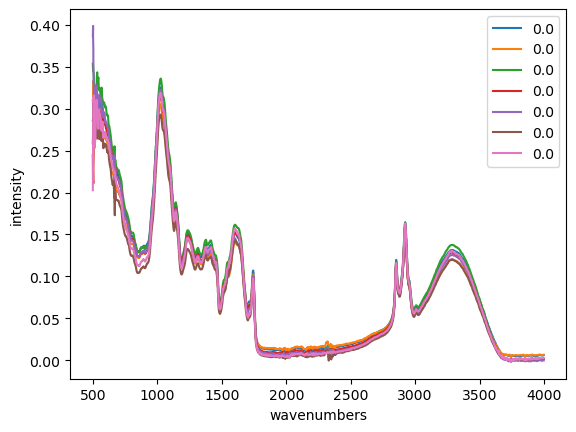

In [21]:
## Each class plotting

x=df.iloc[:, :-1].columns
new_df=df[df['Target']==0]
for i in range(new_df.shape[0]):
    y=new_df.iloc[:, :-1].iloc[i]
    sns.lineplot(x=x, y=y, label=new_df.iloc[i, -1])

plt.xlabel('wavenumbers')
plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40])
plt.ylabel('intensity')
plt.show()

### Discussion

There are no outliers to be removed from new dataset.

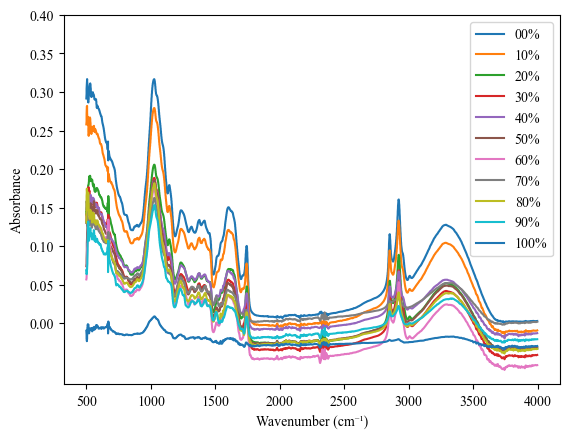

In [33]:
## Class plotting of interval 10%

x = df.iloc[:, :-1].columns
targets = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['00%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']

for i in range(len(targets)):
    new_df = df[df['Target'] == targets[i]]
    new_df = new_df.iloc[:, :-1]
    y = new_df.mean()
    sns.lineplot(x=x, y=y, label=labels[i])

plt.xlabel("Wavenumber (cm⁻¹)")
plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40])
plt.ylabel('Absorbance')

# Save the figure with 600 DPI as a JPEG image
plt.savefig('F1.jpg', dpi=600, format='jpg')

plt.show()

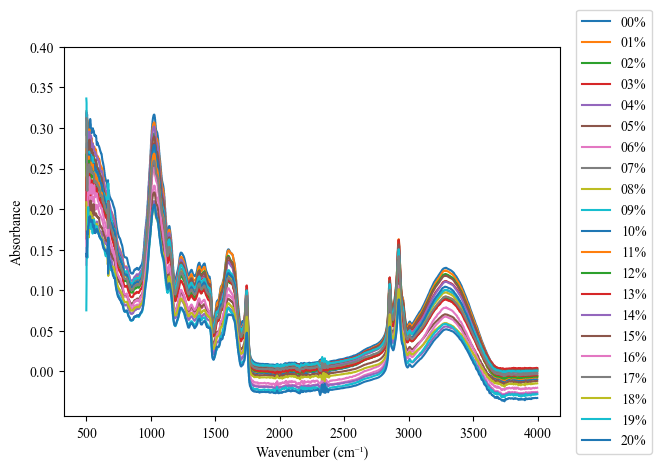

In [34]:
## Class plotting from 0% to 20%

x = df.iloc[:, :-1].columns
targets=[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20]
labels = ['00%', '01%', '02%', '03%', '04%', '05%', '06%', '07%', '08%', '09%', '10%', '11%', '12%', '13%', '14%', '15%', '16%', '17%', '18%', '19%', '20%']

for i in range(len(targets)):
    new_df = df[df['Target'] == targets[i]]
    new_df = new_df.iloc[:, :-1]
    y = new_df.mean()
    sns.lineplot(x=x, y=y, label=labels[i])

plt.xlabel('Wavenumber (cm⁻¹)')
plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40])
plt.ylabel('Absorbance')
plt.legend(loc='center right', bbox_to_anchor=(1.20, 0.5))

# Save the figure with 600 DPI as a JPEG image
plt.savefig('F2.jpg', dpi=600, format='jpg', bbox_inches='tight')

plt.show()

In [24]:
df.to_excel('Dataset O.xlsx')

In [25]:
#Conclusion

In [29]:
string_with_superscript = "x⁻¹ + y³"
print(string_with_superscript)

x⁻¹ + y³
